In [53]:
import pandas as pd

In [54]:
def get_max_close(symbol):
    df = pd.read_csv("nseComp.1.csv".format(symbol))
    return df['Close'].max()
def test_run():
    print("Max close")
    symbol = get_max_close(1)
    print(symbol)
if __name__ == "__main__":
    test_run()

Max close
27970.05


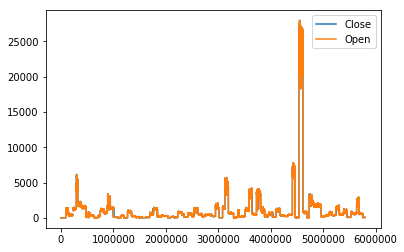

In [5]:
import matplotlib.pyplot as plt
df[["Close","Open"]].plot()
plt.show()

In [104]:
def test_run():
    start_date = "20000101"
    end_date = "20180216"
    date=pd.date_range(start_date,end_date)
    df_date=pd.DataFrame(index=date)
    dfwip=pd.read_csv("HISTORICAL_DATA/WIPRO_data.csv",index_col="Date",parse_dates=True,usecols=["Date","adj_close"],na_values=['nan'])
    dfwip=dfwip.rename(columns={"adj_close":"WIPRO"})
    df_date=df_date.join(dfwip,how='inner')
    symbols = ["INFY_data","TCS_data","MINDTREE_data"]
    i=0
    a=0
    for symbol in symbols:
        df_temp=pd.read_csv("HISTORICAL_DATA/{}.csv".format(symbol), index_col="Date",parse_dates=True, usecols=["Date","adj_close"],na_values=['nan'])
        df_temp=df_temp.rename(columns={"adj_close":symbol})
        df_date = df_date.join(df_temp)
        i+=i
    print(df_date)
    
if __name__ == "__main__":
    test_run()

                 WIPRO    INFY_data     TCS_data  MINDTREE_data
2000-01-03   52.416237    49.233364          NaN            NaN
2000-01-04   56.609615    53.111023          NaN            NaN
2000-01-05   57.532425    48.862305          NaN            NaN
2000-01-06   56.419514    44.953381          NaN            NaN
2000-01-07   51.906364    41.357044          NaN            NaN
2000-01-10   51.976768    43.347805          NaN            NaN
2000-01-11   47.822269    39.880108          NaN            NaN
2000-01-12   49.312683    41.205994          NaN            NaN
2000-01-13   47.722221    38.096237          NaN            NaN
2000-01-14   48.061234    38.366470          NaN            NaN
2000-01-17   51.906364    37.403954          NaN            NaN
2000-01-18   51.510765    37.608032          NaN            NaN
2000-01-19   53.576477    40.614544          NaN            NaN
2000-01-20   53.805450    40.164646          NaN            NaN
2000-01-21   57.524738    42.285667     

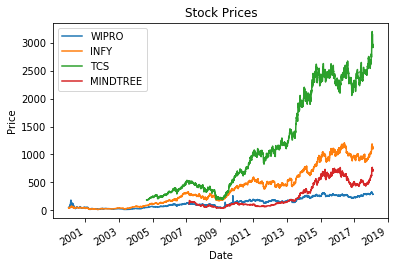

In [150]:
import os
import pandas as pd

def symbol_to_path(symbol,base_dir="HISTORICAL_DATA"):
    return os.path.join(base_dir, "{}_data.csv".format(str(symbol)))
def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if "WIPRO" not in symbols:
        symbols.insert(0,"WIPRO")
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol),index_col='Date',parse_dates=True,usecols=['Date','adj_close'],na_values=['nan'])
        df_temp = df_temp.rename(columns={"adj_close":symbol})
        df = df.join(df_temp)
        if symbol=='WIPRO':
            df=df.dropna(subset=['WIPRO'])
    return df
def test_run():
    dates = pd.date_range('20000101','20180228')
    symbols=['WIPRO','INFY','TCS','MINDTREE']
    df=get_data(symbols,dates)
    df1=df.loc['2017-12-01':'2018-02-16',symbols]
    plot_data(df)
    df=normalised_data(df)
    return df1
def plot_data(df,title="Stock Prices"):
    ax=df.plot(title=title,fontsize=10)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()
def normalised_data(df):
    return df/df.iloc[0,:]
if __name__ =="__main__":
    test_run()
    

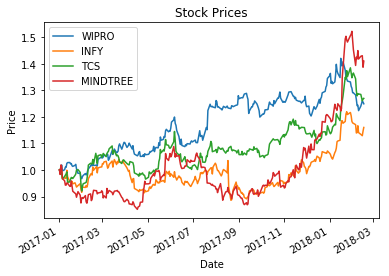

In [154]:
import os
import pandas as pd

def symbol_to_path(symbol,base_dir="HISTORICAL_DATA"):
    return os.path.join(base_dir, "{}_data.csv".format(str(symbol)))
def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if "WIPRO" not in symbols:
        symbols.insert(0,"WIPRO")
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol),index_col='Date',parse_dates=True,usecols=['Date','adj_close'],na_values=['nan'])
        df_temp = df_temp.rename(columns={"adj_close":symbol})
        df = df.join(df_temp)
        if symbol=='WIPRO':
            df=df.dropna(subset=['WIPRO'])
    return df
def test_run():
    dates = pd.date_range('20170101','20180228')
    symbols=['WIPRO','INFY','TCS','MINDTREE']
    df=get_data(symbols,dates)
    df1=df.loc['2017-12-01':'2018-02-16',symbols]
    df=normalised_data(df)
    #df.plot()
    #plt.show()
    plot_data(df)
    return df1
def plot_data(df,title="Stock Prices"):
    ax=df.plot(title=title,fontsize=10)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()
def normalised_data(df):
    return df/df.iloc[0,:]
if __name__ =="__main__":
    test_run()
    

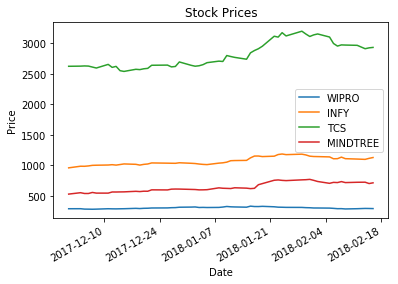

                 WIPRO        INFY          TCS    MINDTREE
2017-01-02  232.946259  972.410095  2310.274658  505.882416
2017-01-03  230.698563  965.367859  2317.025391  497.266693
2017-01-04  234.946976  969.156128  2328.032227  515.379395
2017-01-05  237.318176  967.601990  2283.907227  512.735901
2017-01-06  232.155869  944.386902  2232.053955  489.727875
WIPRO        273.160107
INFY         964.782078
TCS         2503.979395
MINDTREE     511.425682
dtype: float64
WIPRO        281.829895
INFY         953.663208
TCS         2472.280273
MINDTREE     483.279114
dtype: float64
WIPRO        25.647283
INFY         66.946382
TCS         205.253260
MINDTREE     75.616915
dtype: float64


In [160]:
import os
import pandas as pd

def symbol_to_path(symbol,base_dir="HISTORICAL_DATA"):
    return os.path.join(base_dir, "{}_data.csv".format(str(symbol)))
def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if "WIPRO" not in symbols:
        symbols.insert(0,"WIPRO")
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol),index_col='Date',parse_dates=True,usecols=['Date','adj_close'],na_values=['nan'])
        df_temp = df_temp.rename(columns={"adj_close":symbol})
        df = df.join(df_temp)
        if symbol=='WIPRO':
            df=df.dropna(subset=['WIPRO'])
    return df
def test_run():
    dates = pd.date_range('20170101','20180228')
    symbols=['WIPRO','INFY','TCS','MINDTREE']
    df=get_data(symbols,dates)
    df1=df.loc['2017-12-01':'2018-02-16',symbols]
    #df1=normalised_data(df)
    plot_data(df1)
    print(df.head())
    print(df.mean())
    print(df.median())
    print(df.std())
    return df1
def plot_data(df,title="Stock Prices"):
    ax=df.plot(title=title,fontsize=10)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()
def normalised_data(df):
    return df/df.iloc[0,:]
if __name__ =="__main__":
    test_run()
    

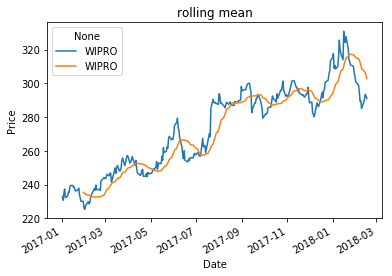

                 WIPRO
2017-01-02  232.946259
2017-01-03  230.698563
2017-01-04  234.946976
2017-01-05  237.318176
2017-01-06  232.155869


In [187]:
import os
import pandas as pd

def symbol_to_path(symbol,base_dir="HISTORICAL_DATA"):
    return os.path.join(base_dir, "{}_data.csv".format(str(symbol)))
def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if "WIPRO" not in symbols:
        symbols.insert(0,"WIPRO")
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol),index_col='Date',parse_dates=True,usecols=['Date','adj_close'],na_values=['nan'])
        df_temp = df_temp.rename(columns={"adj_close":symbol})
        df = df.join(df_temp)
        if symbol=='WIPRO':
            df=df.dropna(subset=['WIPRO'])
    return df
def test_run():
    dates = pd.date_range('20170101','20180228')
    symbols=['WIPRO']
    df=get_data(symbols,dates)
    df1=df.loc['2017-01-01':'2018-02-28',symbols]
    #df1=normalised_data(df)
    plot_data(df1)
    print(df.head())
    return df1
def plot_data(df,title="rolling mean"):
    ax=df.plot(title=title,label='wipro')
    rm_wipro=df.rolling(window=20).mean()
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    rm_wipro.plot(label='Rolling mean', ax=ax)
    plt.show()
def normalised_data(df):
    return df/df.iloc[0,:]
if __name__ =="__main__":
    test_run()
    

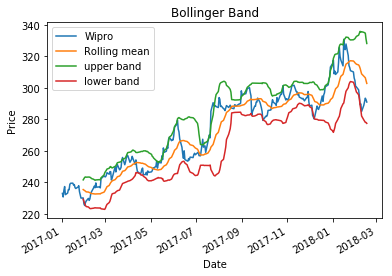

                 WIPRO
2017-01-02  232.946259
2017-01-03  230.698563
2017-01-04  234.946976
2017-01-05  237.318176
2017-01-06  232.155869


In [193]:
import os
import pandas as pd

def symbol_to_path(symbol,base_dir="HISTORICAL_DATA"):
    return os.path.join(base_dir, "{}_data.csv".format(str(symbol)))
def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if "WIPRO" not in symbols:
        symbols.insert(0,"WIPRO")
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol),index_col='Date',parse_dates=True,usecols=['Date','adj_close'],na_values=['nan'])
        df_temp = df_temp.rename(columns={"adj_close":symbol})
        df = df.join(df_temp)
        if symbol=='WIPRO':
            df=df.dropna(subset=['WIPRO'])
    return df
def get_rolling_mean(values, window):
    return values.rolling(20).mean()
def get_rolling_std(values,window):
    return values.rolling(20).std()
def get_bollinger_bands(rm, rstd):
    upper_band = rm+(2*rstd)
    lower_band = rm-(2*rstd)
    return upper_band, lower_band
def test_run():
    dates = pd.date_range('20170101','20180228')
    symbols=['WIPRO']
    df=get_data(symbols,dates)
    df1=df.loc['2017-01-01':'2018-02-28',symbols]
    #df1=normalised_data(df)
    rm_wipro = get_rolling_mean(df['WIPRO'],window=20)
    rstd_wipro = get_rolling_std(df['WIPRO'],window=20)
    upper_band, lower_band = get_bollinger_bands(rm_wipro,rstd_wipro)
    ax = df['WIPRO'].plot(title='Bollinger Band',label='Wipro')
    rm_wipro.plot(label='Rolling mean',ax=ax)
    upper_band.plot(label='upper band',ax=ax)
    lower_band.plot(label='lower band',ax=ax)
    
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    plt.show()
    
    print(df.head())
    return df1
def normalised_data(df):
    return df/df.iloc[0,:]
if __name__ =="__main__":
    test_run()
    

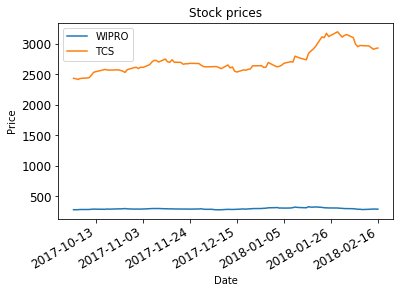

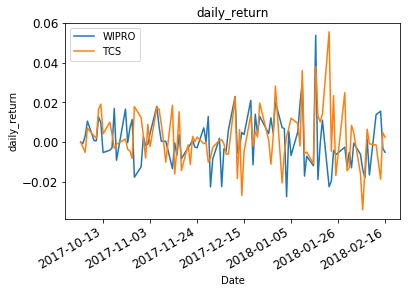

                 WIPRO          TCS
2017-10-03  282.029236  2436.026855
2017-10-04  281.829895  2429.907959
2017-10-05  282.677124  2417.272705
2017-10-06  285.667358  2434.235840
2017-10-09  285.866699  2441.648193


In [203]:
import os
import pandas as pd

def symbol_to_path(symbol,base_dir="HISTORICAL_DATA"):
    return os.path.join(base_dir, "{}_data.csv".format(str(symbol)))
def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if "WIPRO" not in symbols:
        symbols.insert(0,"WIPRO")
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol),index_col='Date',parse_dates=True,usecols=['Date','adj_close'],na_values=['nan'])
        df_temp = df_temp.rename(columns={"adj_close":symbol})
        df = df.join(df_temp)
        if symbol=='WIPRO':
            df=df.dropna(subset=['WIPRO'])
    return df
def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

def compute_daily_return(df):
    daily_return = (df/df.shift(1))-1
    daily_return.iloc[0,:]=0
    return daily_return
def compute_cumulative_return(df,sdate,edate,dates):
    cum_return=[]
    for edate in dates:
        cum_return[edate].append((df[edate]/df[sdate])-1)
    return cum_return
    

def test_run():
    dates = pd.date_range('20171001','20180228')
    symbols=['WIPRO','TCS']
    df=get_data(symbols,dates)
    plot_data(df)
    df1=df.loc['2017-10-01':'2018-02-28',symbols]
    #df1=normalised_data(df)
    daily_return = compute_daily_return(df)
    plot_data(daily_return,title='daily_return',ylabel='daily_return')
    sdate='2017-10-01'
    edate='2018-02-28'
    #cum_return = compute_cumulative_return(df,sdate,edate,dates)
    #plot_data(cum_return,title='cumulative_return',ylabel='cumulative_return')
    
    print(df.head())
    return df1
def normalised_data(df):
    return df/df.iloc[0,:]
if __name__ =="__main__":
    test_run()
    

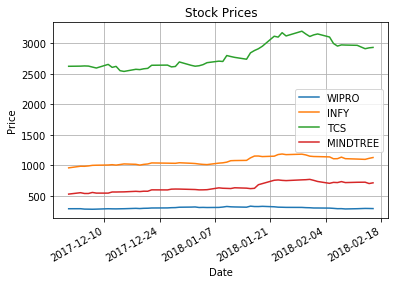

In [211]:
import os
import pandas as pd

def symbol_to_path(symbol,base_dir="HISTORICAL_DATA"):
    return os.path.join(base_dir, "{}_data.csv".format(str(symbol)))
def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if "WIPRO" not in symbols:
        symbols.insert(0,"WIPRO")
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol),index_col='Date',parse_dates=True,usecols=['Date','adj_close'],na_values=['nan'])
        df_temp = df_temp.rename(columns={"adj_close":symbol})
        df = df.join(df_temp)
        if symbol=='WIPRO':
            df=df.dropna(subset=['WIPRO'])
    return df
def test_run():
    dates = pd.date_range('20171201','20180216')
    symbols=['WIPRO','INFY','TCS','MINDTREE']
    df=get_data(symbols,dates)
    df1=df.loc['2017-12-01':'2018-02-16',symbols]
    plot_data(df)
    df=normalised_data(df)
    return df1
def plot_data(df,title="Stock Prices"):
    ax=df.plot(title=title,fontsize=10)
    ax.grid()
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()
def normalised_data(df):
    return df/df.iloc[0,:]
if __name__ =="__main__":
    test_run()
    

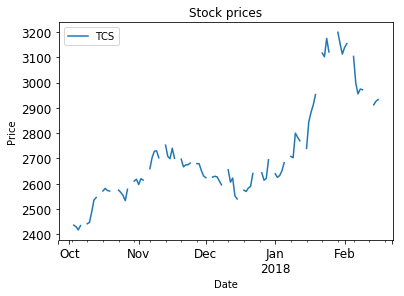

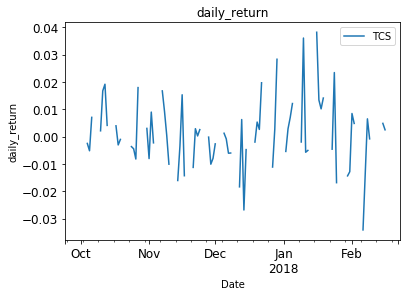

Mean= 0.0009770688021941505
STd= 2017-10-01    0.000000
2017-10-02         NaN
2017-10-03         NaN
2017-10-04   -0.002512
2017-10-05   -0.005200
2017-10-06    0.007017
2017-10-07         NaN
2017-10-08         NaN
2017-10-09         NaN
2017-10-10    0.002099
2017-10-11    0.016712
2017-10-12    0.019137
2017-10-13    0.004081
2017-10-14         NaN
2017-10-15         NaN
2017-10-16         NaN
2017-10-17    0.003927
2017-10-18   -0.003064
2017-10-19   -0.001044
2017-10-20         NaN
2017-10-21         NaN
2017-10-22         NaN
2017-10-23         NaN
2017-10-24   -0.003671
2017-10-25   -0.004472
2017-10-26   -0.008223
2017-10-27    0.017902
2017-10-28         NaN
2017-10-29         NaN
2017-10-30         NaN
                ...   
2018-01-30   -0.014380
2018-01-31   -0.012846
2018-02-01    0.008434
2018-02-02    0.004795
2018-02-03         NaN
2018-02-04         NaN
2018-02-05         NaN
2018-02-06   -0.034142
2018-02-07   -0.014080
2018-02-08    0.006480
2018-02-09   -0.000841
2

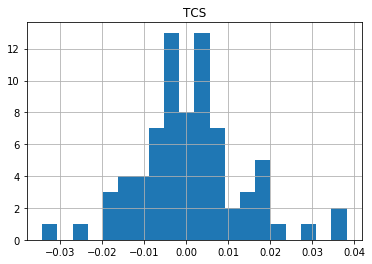

In [225]:
import os
import pandas as pd

def symbol_to_path(symbol,base_dir="HISTORICAL_DATA"):
    return os.path.join(base_dir, "{}_data.csv".format(str(symbol)))
def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    #if "WIPRO" not in symbols:
     #   symbols.insert(0,"WIPRO")
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol),index_col='Date',parse_dates=True,usecols=['Date','adj_close'],na_values=['nan'])
        df_temp = df_temp.rename(columns={"adj_close":symbol})
        df = df.join(df_temp)
        if symbol=='WIPRO':
            df=df.dropna(subset=['WIPRO'])
    return df
def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

def compute_daily_return(df):
    daily_return = (df/df.shift(1))-1
    daily_return.iloc[0,:]=0
    return daily_return
def compute_cumulative_return(df,sdate,edate,dates):
    cum_return=[]
    for edate in dates:
        cum_return[edate].append((df[edate]/df[sdate])-1)
    return cum_return
    

def test_run():
    dates = pd.date_range('20171001','20180228')
    symbols=['TCS']
    df=get_data(symbols,dates)
    plot_data(df)
    df1=df.loc['2017-10-01':'2018-02-28',symbols]
    #df1=normalised_data(df)
    daily_return = compute_daily_return(df)
    plot_data(daily_return,title='daily_return',ylabel='daily_return')
    
    daily_return.hist(bins=20)
    #cum_return = compute_cumulative_return(df,sdate,edate,dates)
    #plot_data(cum_return,title='cumulative_return',ylabel='cumulative_return')
    mean = daily_return['TCS'].mean()
    print('Mean=',mean)
    std =daily_return['TCS']
    print('STd=',std)
    #print(df.head())
    return df1
def normalised_data(df):
    return df/df.iloc[0,:]
if __name__ =="__main__":
    test_run()
    